# Data Understanding

In [1]:
import re # reguläre Ausdrücke

import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

## Einlesen der Daten

In [2]:
# Dateipfad
dateipfad = "original_data/ExpDat_CSEW_1-10.txt"

# Datei auslesen
with open(dateipfad, "r") as datei:
    # Lese den gesamten Inhalt der Datei
    inhalt = datei.read()

inhalt

'#EXPORTTYPE:                  DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                 DATA COMPARE                \n#FILE:                        CSEW1.ngb-sdg                CSEW1.ngb-sdg                CSEW1.ngb-

## 1. Allgemeine Überprüfung

### Zählung der #-Zeichen

In [3]:
count = inhalt.count("#")
print(f"Anzahl der einzelnen #-Zeichen: {count}")

count = inhalt.count("##")
print(f"Anzahl der einzelnen doppelten #-Zeichen: {count}")


Anzahl der einzelnen #-Zeichen: 36
Anzahl der einzelnen doppelten #-Zeichen: 1


In [4]:
# Regulärer Ausdruck, um #-Blöcke zu finden (ein oder mehr # hintereinander)
re_pattern = r'#+'

# Finde alle Übereinstimmungen im Text
matches = re.findall(re_pattern, inhalt)

# Anzahl der gefundenen Übereinstimmungen ausgeben
print("Anzahl der #-Blöcke:", len(matches))

Anzahl der #-Blöcke: 35


### weitere Zählungen
> Stichproben

In [5]:
# Zähle, wie oft "ANSI" vorkommt
count = inhalt.count("ANSI")
print(f'Anzahl an "ANSI": {count}')

Anzahl an "ANSI": 30


In [6]:
# Zähle "DSC/(mW/mg)"
count = inhalt.count("DSC/(mW/mg)")
print(f'Anzahl an "DSC/(mW/mg)": {count}')

Anzahl an "DSC/(mW/mg)": 30


## 2. Überprüfung  der CSV mit Meswerten

In [7]:
info_text, measurements = inhalt.strip().split("##")

In [8]:
measurements_df = pd.read_csv(StringIO(measurements), sep=';', index_col=0)
measurements_df

,DSC/(mW/mg),DSC/(mW/mg).1,DSC/(mW/mg).2,DSC/(mW/mg).3,DSC/(mW/mg).4,DSC/(mW/mg).5,DSC/(mW/mg).6,DSC/(mW/mg).7,DSC/(mW/mg).8,DSC/(mW/mg).9,...,DSC/(mW/mg).20,DSC/(mW/mg).21,DSC/(mW/mg).22,DSC/(mW/mg).23,DSC/(mW/mg).24,DSC/(mW/mg).25,DSC/(mW/mg).26,DSC/(mW/mg).27,DSC/(mW/mg).28,DSC/(mW/mg).29
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-52.65517,,,,,,0.14225,,,-0.029924,,...,-0.039898,,,0.10237,,,0.11495,,,0.10098
-51.65517,,,-1.244860e-03,,,0.14225,,,0.387060,,...,0.342470,,,0.10237,,,0.11495,,,0.10098
-50.65517,,,-1.244860e-03,,,0.14225,,,0.385080,,...,0.356910,,,0.34722,,,0.11495,,,0.10098
-49.65517,,,-1.244860e-03,,,0.14225,,,0.377390,,...,0.364270,,,0.34944,,,0.34142,,,0.30620
-48.65517,,,0.30763,,,0.29038,,,0.368820,,...,0.365330,,,0.34654,,,0.34173,,,0.31276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.34483,0.48494,-0.52824,0.47063,0.44773,-0.55430,0.42807,0.48141,-0.54607,0.460850,0.43996,...,0.409020,0.49630,-0.62642,0.47793,0.53621,-0.59238,0.52713,0.51470,-0.56837,0.49530
296.34483,0.48507,-0.46364,0.47154,0.44802,-0.50039,0.42865,0.48213,-0.49179,0.461690,0.44016,...,0.409510,0.49622,-0.56828,0.47866,0.53647,-0.52597,0.52790,0.51516,-0.49887,0.49587
297.34483,0.48494,-0.36089,0.47233,0.44790,-0.41199,0.42943,0.48211,-0.40234,0.462620,0.44011,...,0.410200,0.49632,-0.46839,0.47954,0.53691,-0.41991,0.52888,0.51560,-0.38983,0.49663


In [9]:
print(type(measurements_df.iloc[1]["DSC/(mW/mg)"]))
measurements_df.iloc[1]["DSC/(mW/mg)"]

<class 'str'>


'             '

In [10]:
measurements_df = measurements_df.apply(pd.to_numeric, errors='coerce')
measurements_df 

,DSC/(mW/mg),DSC/(mW/mg).1,DSC/(mW/mg).2,DSC/(mW/mg).3,DSC/(mW/mg).4,DSC/(mW/mg).5,DSC/(mW/mg).6,DSC/(mW/mg).7,DSC/(mW/mg).8,DSC/(mW/mg).9,...,DSC/(mW/mg).20,DSC/(mW/mg).21,DSC/(mW/mg).22,DSC/(mW/mg).23,DSC/(mW/mg).24,DSC/(mW/mg).25,DSC/(mW/mg).26,DSC/(mW/mg).27,DSC/(mW/mg).28,DSC/(mW/mg).29
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-52.65517,NaN,NaN,NaN,NaN,NaN,0.14225,NaN,NaN,-0.029924,NaN,...,-0.039898,NaN,NaN,0.10237,NaN,NaN,0.11495,NaN,NaN,0.10098
-51.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.387060,NaN,...,0.342470,NaN,NaN,0.10237,NaN,NaN,0.11495,NaN,NaN,0.10098
-50.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.385080,NaN,...,0.356910,NaN,NaN,0.34722,NaN,NaN,0.11495,NaN,NaN,0.10098
-49.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.377390,NaN,...,0.364270,NaN,NaN,0.34944,NaN,NaN,0.34142,NaN,NaN,0.30620
-48.65517,NaN,NaN,0.307630,NaN,NaN,0.29038,NaN,NaN,0.368820,NaN,...,0.365330,NaN,NaN,0.34654,NaN,NaN,0.34173,NaN,NaN,0.31276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.34483,0.48494,-0.528240,0.470630,0.44773,-0.554300,0.42807,0.48141,-0.546070,0.460850,0.43996,...,0.409020,0.49630,-0.626420,0.47793,0.53621,-0.592380,0.52713,0.51470,-0.568370,0.49530
296.34483,0.48507,-0.463640,0.471540,0.44802,-0.500390,0.42865,0.48213,-0.491790,0.461690,0.44016,...,0.409510,0.49622,-0.568280,0.47866,0.53647,-0.525970,0.52790,0.51516,-0.498870,0.49587
297.34483,0.48494,-0.360890,0.472330,0.44790,-0.411990,0.42943,0.48211,-0.402340,0.462620,0.44011,...,0.410200,0.49632,-0.468390,0.47954,0.53691,-0.419910,0.52888,0.51560,-0.389830,0.49663


In [11]:
measurements_df.describe()

,DSC/(mW/mg),DSC/(mW/mg).1,DSC/(mW/mg).2,DSC/(mW/mg).3,DSC/(mW/mg).4,DSC/(mW/mg).5,DSC/(mW/mg).6,DSC/(mW/mg).7,DSC/(mW/mg).8,DSC/(mW/mg).9,...,DSC/(mW/mg).20,DSC/(mW/mg).21,DSC/(mW/mg).22,DSC/(mW/mg).23,DSC/(mW/mg).24,DSC/(mW/mg).25,DSC/(mW/mg).26,DSC/(mW/mg).27,DSC/(mW/mg).28,DSC/(mW/mg).29
count,282.000000,347.000000,352.000000,282.000000,345.000000,353.000000,282.000000,344.000000,353.000000,282.000000,...,353.000000,282.000000,345.000000,353.000000,282.000000,345.000000,353.000000,282.000000,345.000000,353.000000
mean,0.425965,-0.373397,0.382205,0.391975,-0.363049,0.355262,0.425250,-0.372055,0.379335,0.399789,...,0.358500,0.452405,-0.412893,0.404872,0.482590,-0.418102,0.429591,0.453779,-0.402204,0.409757
std,0.059044,0.066429,0.063374,0.057263,0.071893,0.050207,0.058156,0.068811,0.054505,0.052727,...,0.047457,0.061337,0.085052,0.058862,0.068961,0.079821,0.072234,0.069757,0.078583,0.068210
min,-0.004644,-0.571620,-0.001245,0.000845,-0.579260,0.142250,-0.002507,-0.573580,-0.029924,-0.001234,...,-0.039898,0.000800,-0.650630,0.102370,-0.003473,-0.631280,0.114950,-0.003503,-0.612410,0.100980
25%,0.417445,-0.413080,0.343348,0.376402,-0.406970,0.321670,0.414922,-0.411685,0.343780,0.392317,...,0.335400,0.434588,-0.468010,0.365030,0.465355,-0.462990,0.380840,0.433053,-0.447390,0.365700
50%,0.430040,-0.385890,0.388215,0.402780,-0.374850,0.360510,0.427210,-0.385125,0.383950,0.401585,...,0.362570,0.449085,-0.424260,0.410610,0.481040,-0.430330,0.437520,0.459385,-0.414220,0.420250
75%,0.462938,-0.347500,0.427262,0.427787,-0.332480,0.393470,0.462102,-0.348373,0.421480,0.431327,...,0.395040,0.487907,-0.378570,0.452130,0.524720,-0.393870,0.484140,0.499325,-0.376900,0.460540
max,0.493990,-0.021384,0.473250,0.457750,-0.065092,0.442090,0.499190,-0.047419,0.464360,0.478020,...,0.484030,0.581280,-0.088159,0.548470,0.630540,-0.027724,0.590840,0.589430,-0.019604,0.568010


### Plots

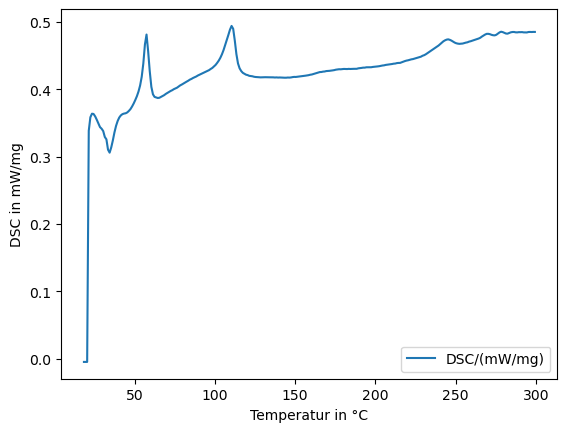

In [12]:
column = 'DSC/(mW/mg)'
plt.plot(measurements_df[column], label=column)
plt.xlabel('Temperatur in °C')
plt.ylabel('DSC in mW/mg')
plt.legend()
plt.show()

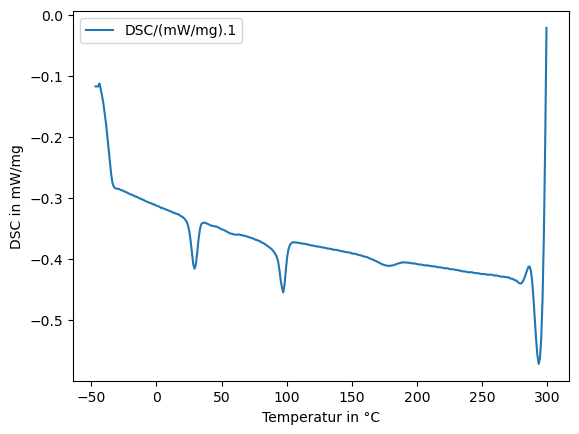

In [13]:
column = 'DSC/(mW/mg).1'
plt.plot(measurements_df[column], label=column)
plt.xlabel('Temperatur in °C')
plt.ylabel('DSC in mW/mg')
plt.legend()
plt.show()

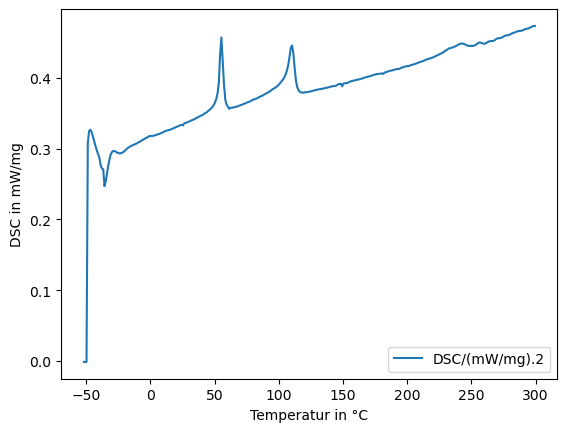

In [14]:
column = 'DSC/(mW/mg).2'
plt.plot(measurements_df[column], label=column)
plt.xlabel('Temperatur in °C')
plt.ylabel('DSC in mW/mg')
plt.legend()
plt.show()

> Diese drei Plots stellen eine ganze Messung (Serie) da!
> 1. Erhitzen von 20°C auf 300°C
> 2. Abhühlen auf -50°C
> 3. Erhitzen auf 300°C


### weitere Serien

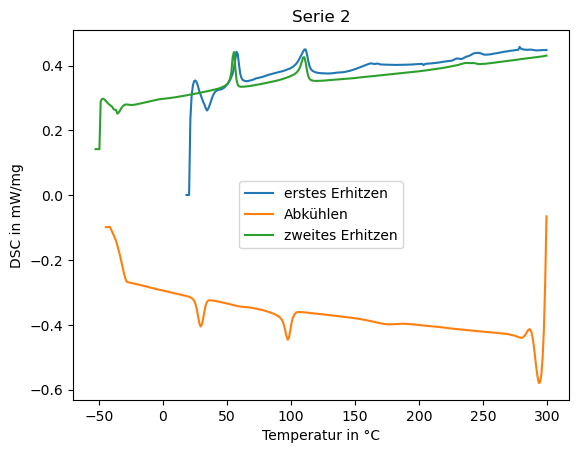

In [15]:
column = 'DSC/(mW/mg)'
plt.plot(measurements_df[column+".3"], label = "erstes Erhitzen")
plt.plot(measurements_df[column+".4"], label="Abkühlen")
plt.plot(measurements_df[column+".5"], label = "zweites Erhitzen")
plt.xlabel('Temperatur in °C')
plt.ylabel('DSC in mW/mg')
plt.title('Serie 2')
plt.legend()
plt.show()

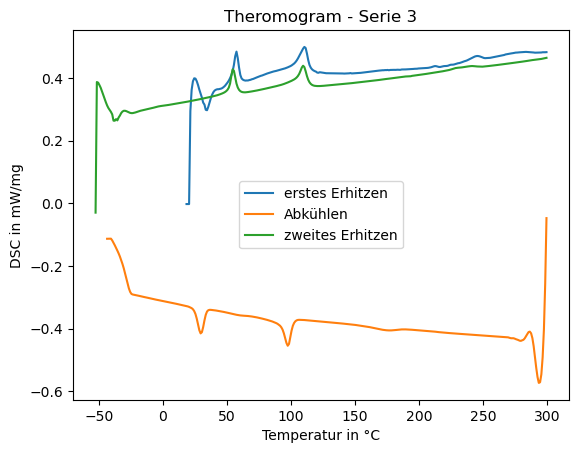

In [16]:
column = 'DSC/(mW/mg)'
plt.plot(measurements_df[column+".6"], label = "erstes Erhitzen")
plt.plot(measurements_df[column+".7"], label="Abkühlen")
plt.plot(measurements_df[column+".8"], label = "zweites Erhitzen")
plt.xlabel('Temperatur in °C')
plt.ylabel('DSC in mW/mg')
plt.title('Theromogram - Serie 3')
plt.legend()
plt.show()

> drei Spalten gehören immer zusammen!